In [1]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import sklearn as skl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
merged_df=pd.read_csv(Path('CV_cigaretee.csv'))

In [3]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler = MinMaxScaler()

X_scaler = min_max_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 1, More Neurons on Activation/Hidden Layers

In [7]:
# Create the Keras Sequential model
opt1_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=29))

In [9]:
# Add our hidden layer layer, including the input layer
opt1_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

In [10]:
# Add the output layer that uses a probability activation function
opt1_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [11]:
# Check the structure of the Sequential model
opt1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
opt1_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model = opt1_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 159.5660 - mae: 11.2544 - val_loss: 16.9361 - val_mae: 3.7358
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 8.9645 - mae: 2.4040 - val_loss: 2.9271 - val_mae: 1.3331
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7075 - mae: 1.1874 - val_loss: 2.8228 - val_mae: 1.2714
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.4999 - mae: 1.1553 - val_loss: 2.8672 - val_mae: 1.2930
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3840 - mae: 1.1524 - val_loss: 2.4800 - val_mae: 1.2256
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3066 - mae: 1.1133 - val_loss: 2.5039 - val_mae: 1.2128
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2289 - mae: 1.1180 - val_loss: 2.1908 - val_mae: 1.1559
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.500

10/10 [==============================] - 0s 3ms/step - loss: 0.6919 - mae: 0.6785 - val_loss: 0.3980 - val_mae: 0.5182
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5312 - mae: 0.5868 - val_loss: 1.1017 - val_mae: 0.8940
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7031 - mae: 0.6616 - val_loss: 1.0695 - val_mae: 0.8801
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6515 - mae: 0.6660 - val_loss: 0.6197 - val_mae: 0.6484
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4299 - mae: 0.5321 - val_loss: 0.3823 - val_mae: 0.5121
Epoch 68/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7286 - mae: 0.6744 - val_loss: 0.4173 - val_mae: 0.5327
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4947 - mae: 0.5714 - val_loss: 1.1129 - val_mae: 0.9042
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6184 - mae: 0

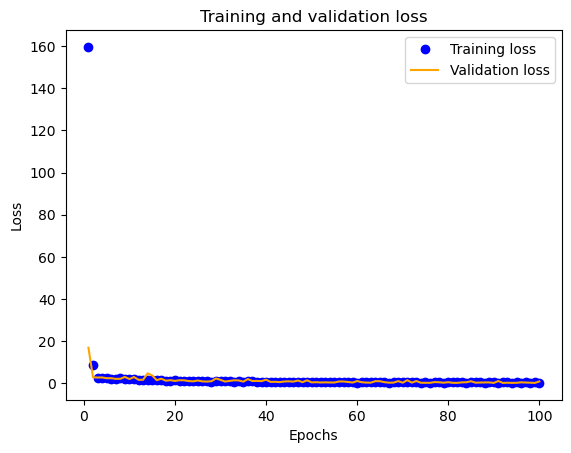

In [13]:
history_dict = fit_model.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 997us/step


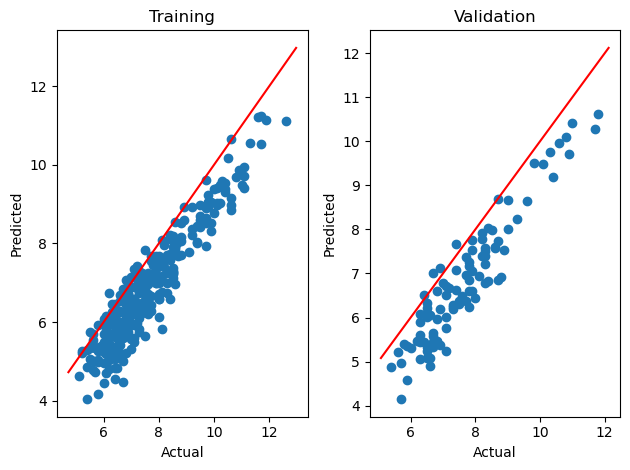

In [15]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt1_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt1_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [16]:
# metrics
pred = opt1_model.predict(X_test)
pred

trainpreds = opt1_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 997us/step
0.7793585949256772
0.8724582307478963


## Optimization Attempt 2 (additional Hidden layer more epochs)

In [95]:
# define X (inputs) and y (target/output)
X = merged_df.drop(columns = ["Year-State","Major CV Disease-Overall"], axis=1)
y = merged_df[['Major CV Disease-Overall']]

In [96]:
X = np.array(X)
y = np.array(y)

In [97]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(305, 29) (102, 29) (305, 1) (102, 1)


In [98]:
from sklearn.preprocessing import MinMaxScaler
# Create scaler instance
min_max_scaler2 = MinMaxScaler()

X_scaler2 = min_max_scaler2.fit(X_train)

# Scale the data
X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [99]:
# Create the Keras Sequential model
opt2_model = tf.keras.models.Sequential()

In [100]:
# Add our first Dense layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=29))

In [101]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [102]:
# Add our hidden layer layer, including the input layer
opt2_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [103]:
# Add the output layer that uses a probability activation function
opt2_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [104]:
# Check the structure of the Sequential model
opt2_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 5)                 150       
                                                                 
 dense_28 (Dense)            (None, 5)                 30        
                                                                 
 dense_29 (Dense)            (None, 5)                 30        
                                                                 
 dense_30 (Dense)            (None, 1)                 6         
                                                                 
Total params: 216 (864.00 Byte)
Trainable params: 216 (864.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
# Compile the Sequential model together and customize metrics
opt2_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Fit the model to the training data
fit_model2 = opt2_model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=250,
                    verbose=1)

Epoch 1/250
10/10 [==============================] - 0s 12ms/step - loss: 62.7921 - mae: 7.7910 - val_loss: 61.3272 - val_mae: 7.7119
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 60.7636 - mae: 7.6568 - val_loss: 60.2583 - val_mae: 7.6415
Epoch 3/250
10/10 [==============================] - 0s 3ms/step - loss: 59.6893 - mae: 7.5859 - val_loss: 59.0504 - val_mae: 7.5613
Epoch 4/250
10/10 [==============================] - 0s 3ms/step - loss: 57.9116 - mae: 7.4668 - val_loss: 55.4307 - val_mae: 7.3189
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 52.2091 - mae: 7.0778 - val_loss: 47.4807 - val_mae: 6.7595
Epoch 6/250
10/10 [==============================] - 0s 3ms/step - loss: 43.5178 - mae: 6.4357 - val_loss: 37.8322 - val_mae: 6.0087
Epoch 7/250
10/10 [==============================] - 0s 3ms/step - loss: 33.6441 - mae: 5.6228 - val_loss: 27.7564 - val_mae: 5.1080
Epoch 8/250
10/10 [==============================] - 0s 3ms/step - l

Epoch 63/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4488 - mae: 0.5191 - val_loss: 0.3718 - val_mae: 0.5121
Epoch 64/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4488 - mae: 0.5225 - val_loss: 0.3247 - val_mae: 0.4754
Epoch 65/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4519 - mae: 0.5222 - val_loss: 0.3456 - val_mae: 0.4957
Epoch 66/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4306 - mae: 0.5096 - val_loss: 0.3197 - val_mae: 0.4683
Epoch 67/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4149 - mae: 0.5002 - val_loss: 0.3119 - val_mae: 0.4619
Epoch 68/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4212 - mae: 0.4967 - val_loss: 0.3359 - val_mae: 0.4749
Epoch 69/250
10/10 [==============================] - 0s 3ms/step - loss: 0.4185 - mae: 0.5065 - val_loss: 0.3254 - val_mae: 0.4683
Epoch 70/250
10/10 [==============================] - 0s 3ms/step - loss: 0.

Epoch 125/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2408 - mae: 0.3791 - val_loss: 0.2062 - val_mae: 0.3761
Epoch 126/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2399 - mae: 0.3810 - val_loss: 0.2203 - val_mae: 0.3747
Epoch 127/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2443 - mae: 0.3807 - val_loss: 0.2971 - val_mae: 0.4295
Epoch 128/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2439 - mae: 0.3857 - val_loss: 0.2171 - val_mae: 0.3720
Epoch 129/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2376 - mae: 0.3761 - val_loss: 0.1889 - val_mae: 0.3608
Epoch 130/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2302 - mae: 0.3748 - val_loss: 0.2023 - val_mae: 0.3634
Epoch 131/250
10/10 [==============================] - 0s 3ms/step - loss: 0.2430 - mae: 0.3791 - val_loss: 0.1849 - val_mae: 0.3548
Epoch 132/250
10/10 [==============================] - 0s 3ms/step - 

10/10 [==============================] - 0s 3ms/step - loss: 0.1654 - mae: 0.3200 - val_loss: 0.1461 - val_mae: 0.3102
Epoch 187/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1679 - mae: 0.3212 - val_loss: 0.1654 - val_mae: 0.3238
Epoch 188/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1713 - mae: 0.3240 - val_loss: 0.1612 - val_mae: 0.3251
Epoch 189/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1676 - mae: 0.3218 - val_loss: 0.1322 - val_mae: 0.2978
Epoch 190/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1662 - mae: 0.3183 - val_loss: 0.1348 - val_mae: 0.2995
Epoch 191/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1609 - mae: 0.3161 - val_loss: 0.1525 - val_mae: 0.3124
Epoch 192/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1652 - mae: 0.3156 - val_loss: 0.1405 - val_mae: 0.3042
Epoch 193/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1666 -

Epoch 248/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1217 - mae: 0.2755 - val_loss: 0.0960 - val_mae: 0.2514
Epoch 249/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1130 - mae: 0.2660 - val_loss: 0.0977 - val_mae: 0.2528
Epoch 250/250
10/10 [==============================] - 0s 3ms/step - loss: 0.1149 - mae: 0.2714 - val_loss: 0.1089 - val_mae: 0.2669


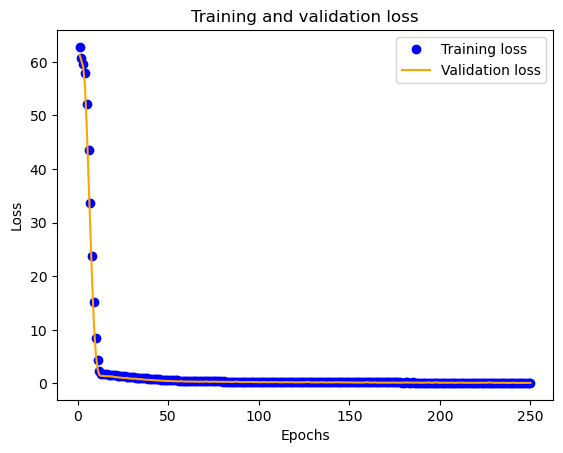

In [106]:
history_dict2 = fit_model2.history
loss_values2 = history_dict2['loss'] # you can change this
val_loss_values2 = history_dict2['val_loss'] # you can also change this
epochs2 = range(1, len(loss_values2) + 1) # range of X (no. of epochs)
plt.plot(epochs2, loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 665us/step


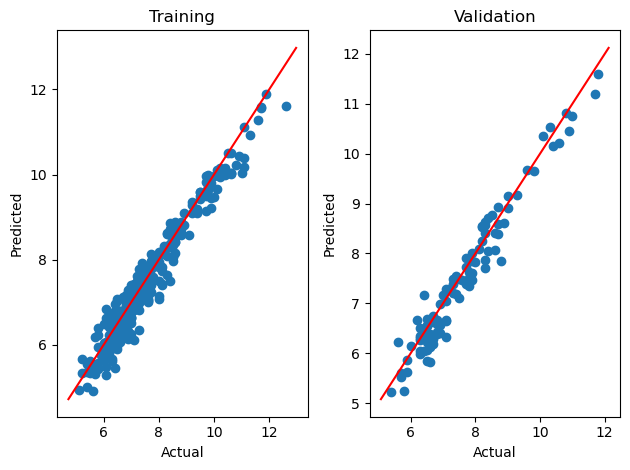

In [107]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=opt2_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=opt2_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [108]:
# metrics
pred = opt2_model.predict(X_test)
pred

trainpreds = opt2_model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

10/10 [==============================] - 0s 779us/step
0.26609613043362973
0.2669292805241604
